In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Load the dataset 
df = pd.read_csv(r"C:\Users\Ishita\Downloads\country_wise_latest.csv")

df.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [5]:
# Checking for missing data
missing_data = df.isnull().sum()
print("\nMissing Data Analysis:")
print(missing_data)


Missing Data Analysis:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [7]:
# Data Preprocessing
# Checking for negative values in columns like deaths, which should be impossible
df['Deaths'] = df['Deaths'].clip(lower=0)
df['Confirmed'] = df['Confirmed'].clip(lower=0)
df['Recovered'] = df['Recovered'].clip(lower=0)
df['Active'] = df['Active'].clip(lower=0)

# Calculate additional metrics: Case Fatality Rate (CFR) and Recovery Rate
df['CFR'] = (df['Deaths'] / df['Confirmed']) * 100  # Case Fatality Rate (%)
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']) * 100  # Recovery Rate (%)
df['Recovery to Death Ratio'] = df['Recovered'] / df['Deaths']  # Recovery to Death ratio

# Checking the data after preprocessing
print("\nData after cleaning:")
print(df.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country/Region           187 non-null    object 
 1   Confirmed                187 non-null    int64  
 2   Deaths                   187 non-null    int64  
 3   Recovered                187 non-null    int64  
 4   Active                   187 non-null    int64  
 5   New cases                187 non-null    int64  
 6   New deaths               187 non-null    int64  
 7   New recovered            187 non-null    int64  
 8   Deaths / 100 Cases       187 non-null    float64
 9   Recovered / 100 Cases    187 non-null    float64
 10  Deaths / 100 Recovered   187 non-null    float64
 11  Confirmed last week      187 non-null    int64  
 12  1 week change            187 non-null    int64  
 13  1 week % increase        187 non-null    float64
 14  WHO 

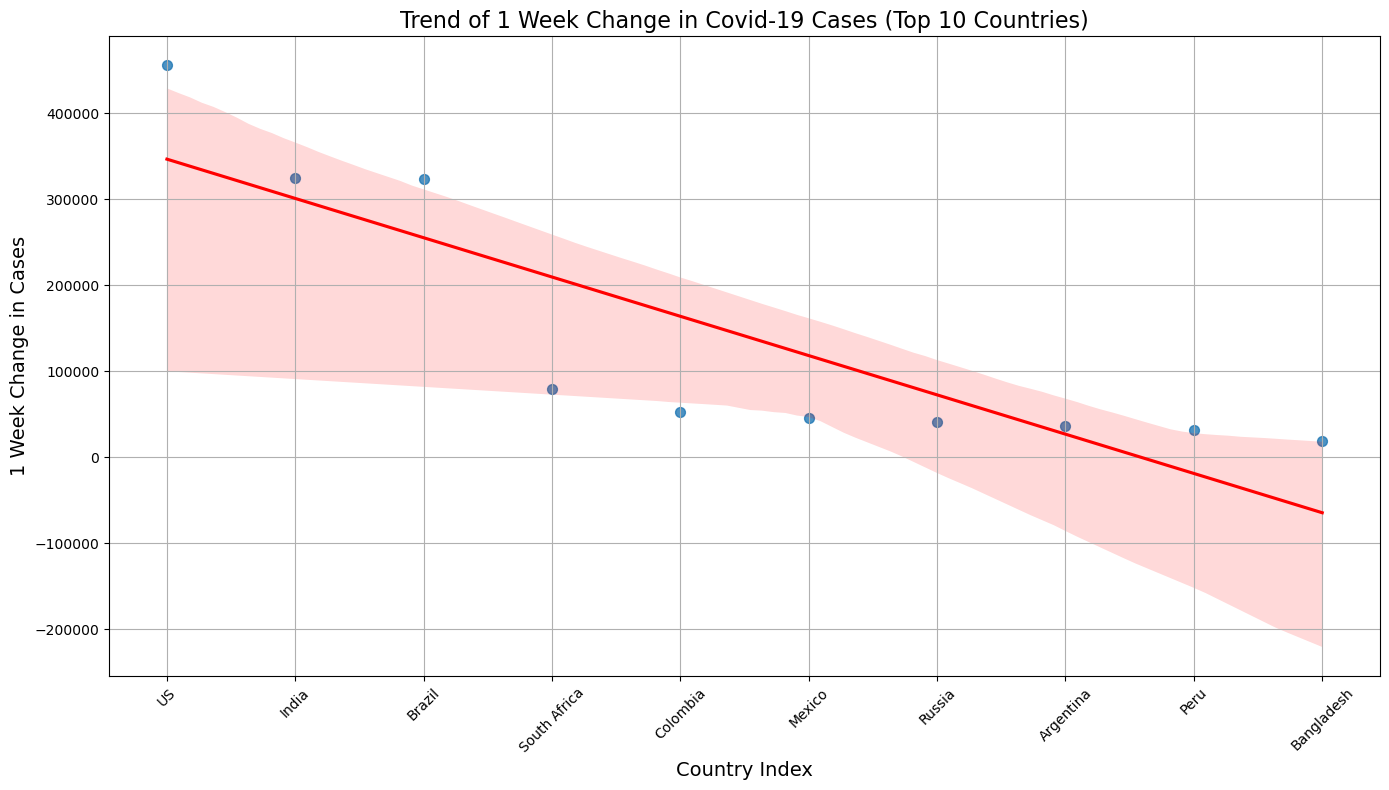

In [21]:
# Function to plot the trend of 1 week change in top 10 countries
def plot_1_week_change_trend(df):
    plt.figure(figsize=(14, 8))
    sns.regplot(x='Index', y='1 week change', data=df, scatter_kws={'s': 50}, line_kws={"color": "red"})
    plt.title('Trend of 1 Week Change in Covid-19 Cases (Top 10 Countries)', fontsize=16)
    plt.xlabel('Country Index', fontsize=14)
    plt.ylabel('1 Week Change in Cases', fontsize=14)
    plt.xticks(ticks=df['Index'], labels=df['Country/Region'], rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the 1 Week Change Trend
plot_1_week_change_trend(top_10_countries_by_change)

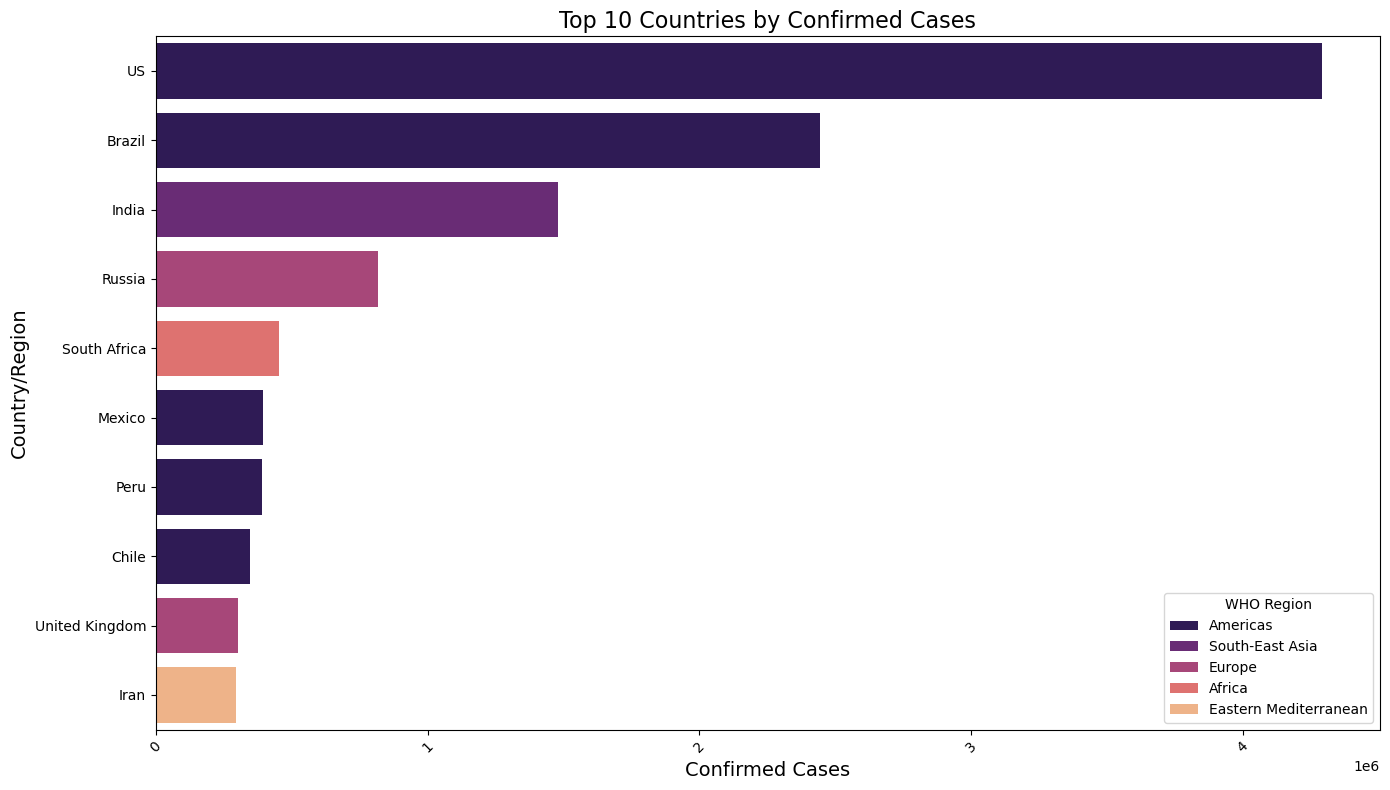

In [60]:
# Plotting: Top 10 Countries by Confirmed Cases (with 'hue' to avoid warning)
top_countries = df.nlargest(10, 'Confirmed')  # Select the top 10 countries by confirmed cases
plt.figure(figsize=(14, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, hue='WHO Region', palette='magma')
plt.title('Top 10 Countries by Confirmed Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=14)
plt.ylabel('Country/Region', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


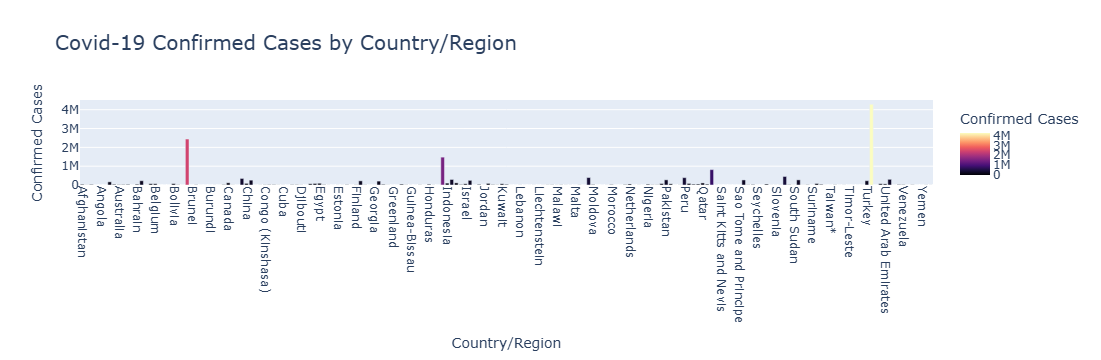

In [25]:
# Plotting: Interactive Bar Plot using Plotly (Top 10 Countries)
fig = px.bar(df, x='Country/Region', y='Confirmed', color='Confirmed',
             title='Covid-19 Confirmed Cases by Country/Region',
             labels={'Country/Region': 'Country/Region', 'Confirmed': 'Confirmed Cases'},
             color_continuous_scale="magma")
fig.update_xaxes(tickangle=90)  # Rotate x-axis labels for readability
fig.update_layout(title_font_size=20)
fig.show()

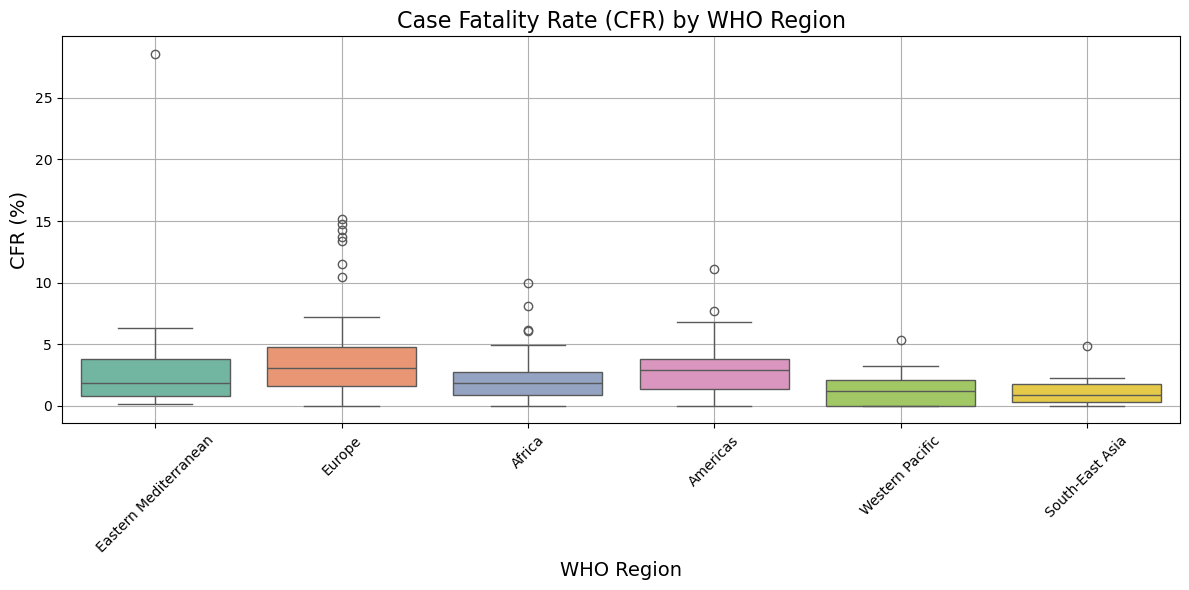

In [52]:
# Plotting: CFR by WHO Region (Boxplot) with Customizations
plt.figure(figsize=(12, 6))
# Using hue to avoid deprecation warning
sns.boxplot(x='WHO Region', y='CFR', data=df, palette="Set2", hue='WHO Region')
plt.title('Case Fatality Rate (CFR) by WHO Region', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('CFR (%)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()



# # Using hue to avoid deprecation warning
# sns.barplot(x=column, y='Country/Region', data=top_countries, palette='magma', hue='Country/Region')


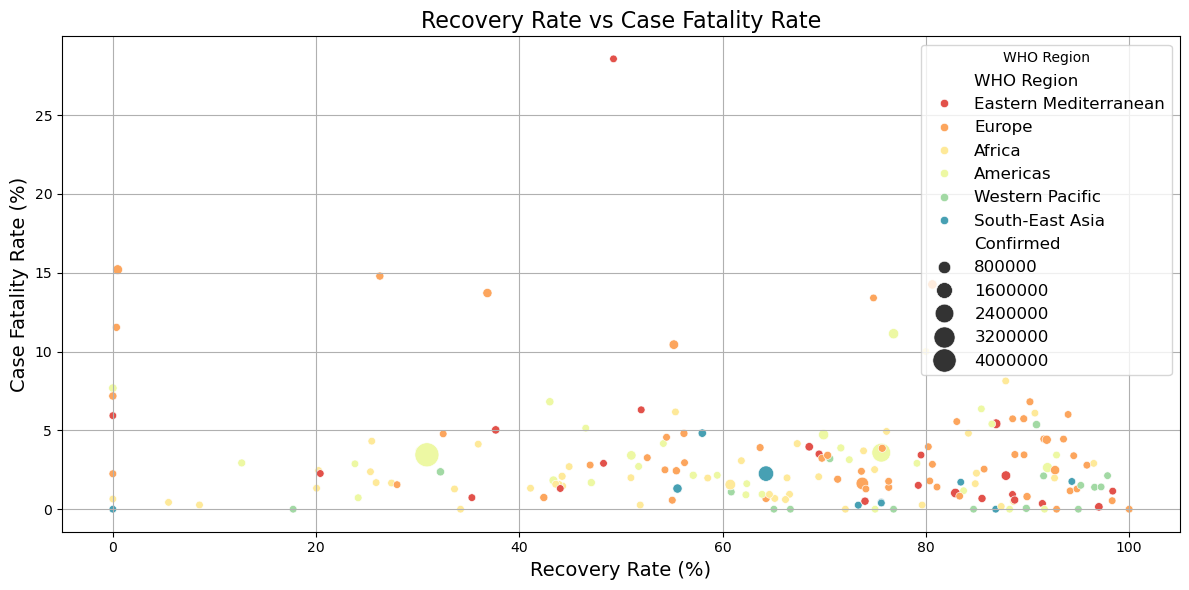

In [29]:
# Scatterplot: Recovery Rate vs Case Fatality Rate with Custom Marker Sizes and Hue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Recovery Rate', y='CFR', data=df, hue='WHO Region', palette='Spectral', 
                size='Confirmed', sizes=(30, 300), marker='o')
plt.title('Recovery Rate vs Case Fatality Rate', fontsize=16)
plt.xlabel('Recovery Rate (%)', fontsize=14)
plt.ylabel('Case Fatality Rate (%)', fontsize=14)
plt.legend(title="WHO Region", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

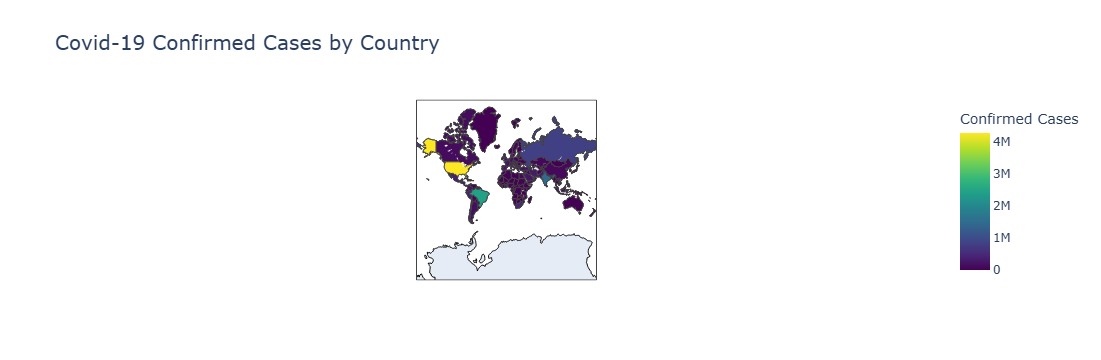

In [31]:
# Plotly Choropleth Map: Covid-19 Cases by Country
fig = px.choropleth(df, locations="Country/Region", locationmode='country names', color="Confirmed",
                    hover_name="Country/Region", color_continuous_scale="Viridis", 
                    labels={'Confirmed': 'Confirmed Cases'}, title="Covid-19 Confirmed Cases by Country")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="mercator")
fig.update_layout(title_font_size=20)
fig.show()

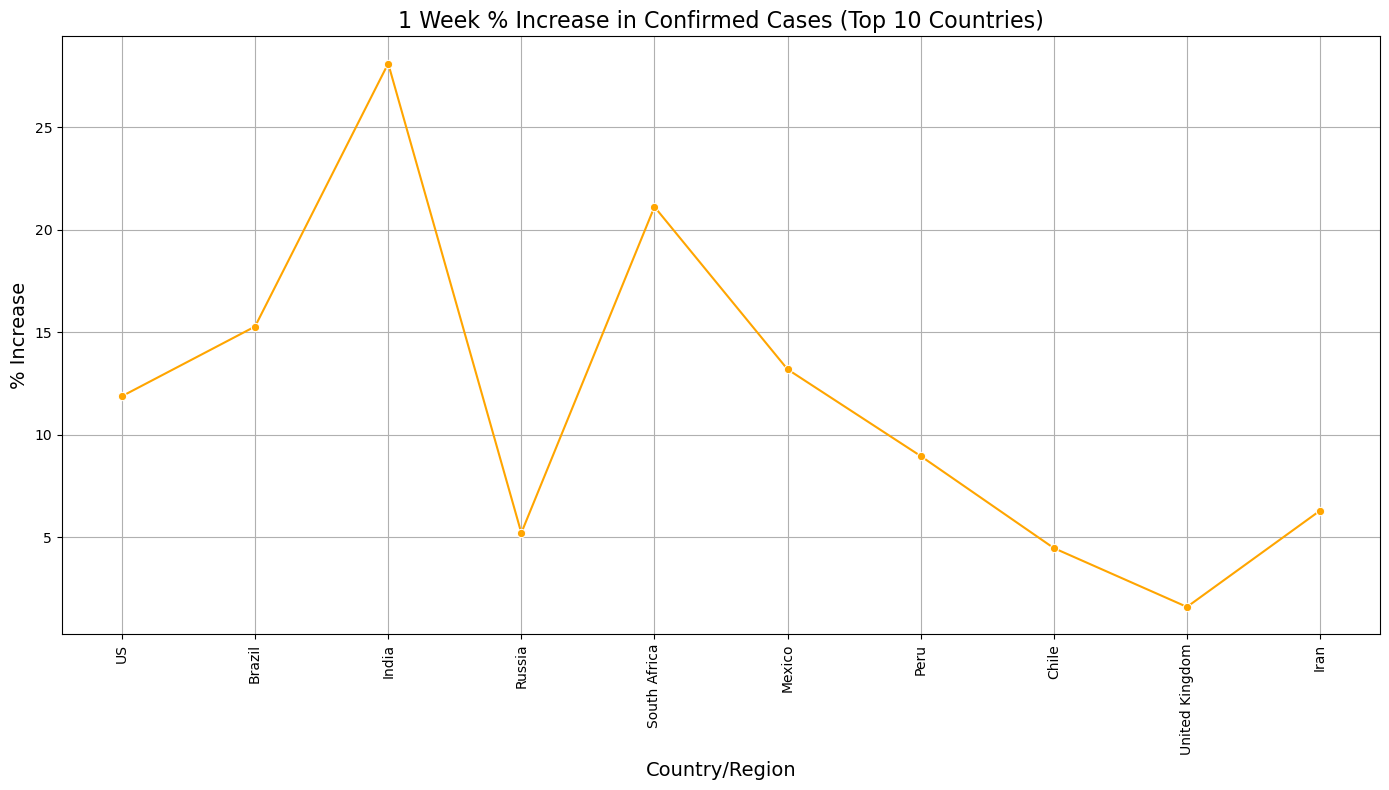

In [33]:

# Plotting: 1 Week % Increase in Confirmed Cases for Top 10 Countries
top_10_countries = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(14, 8))
sns.lineplot(x='Country/Region', y='1 week % increase', data=top_10_countries, marker='o', color='orange')
plt.title('1 Week % Increase in Confirmed Cases (Top 10 Countries)', fontsize=16)
plt.xlabel('Country/Region', fontsize=14)
plt.ylabel('% Increase', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

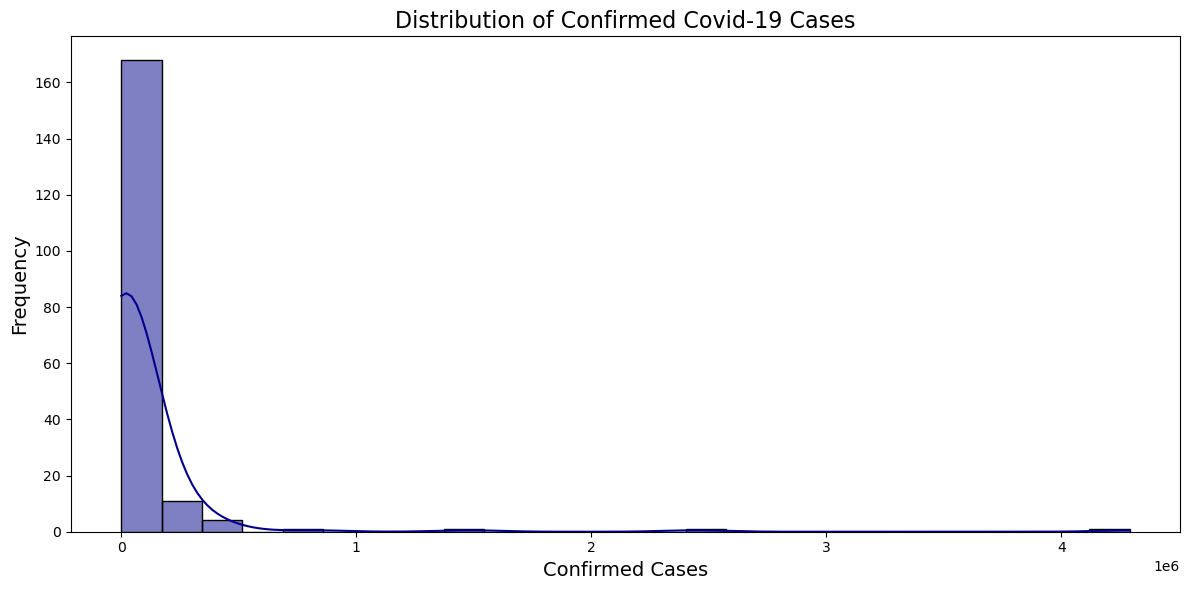

In [35]:
# Distribution of Confirmed Cases with Custom Bins and KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['Confirmed'], kde=True, color='darkblue', bins=25)
plt.title('Distribution of Confirmed Covid-19 Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()


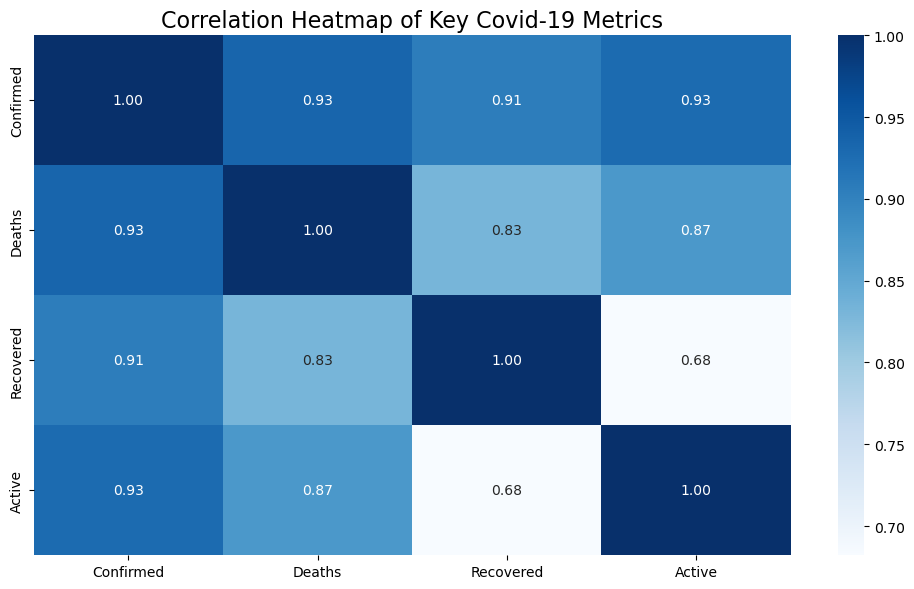

In [48]:
# Statistical Analysis: Correlation Heatmap
corr_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title('Correlation Heatmap of Key Covid-19 Metrics', fontsize=16)
plt.tight_layout()
plt.show()